<a href="https://colab.research.google.com/github/Nanjundeswari-2406/CODSOFT/blob/main/MovieRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split




Loading the dataset


In [ ]:
df = pd.read_csv('/content/Movies.csv', encoding='latin-1')


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [ ]:
df.dropna(inplace = True)
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

In [ ]:
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [ ]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [ ]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Data visualization

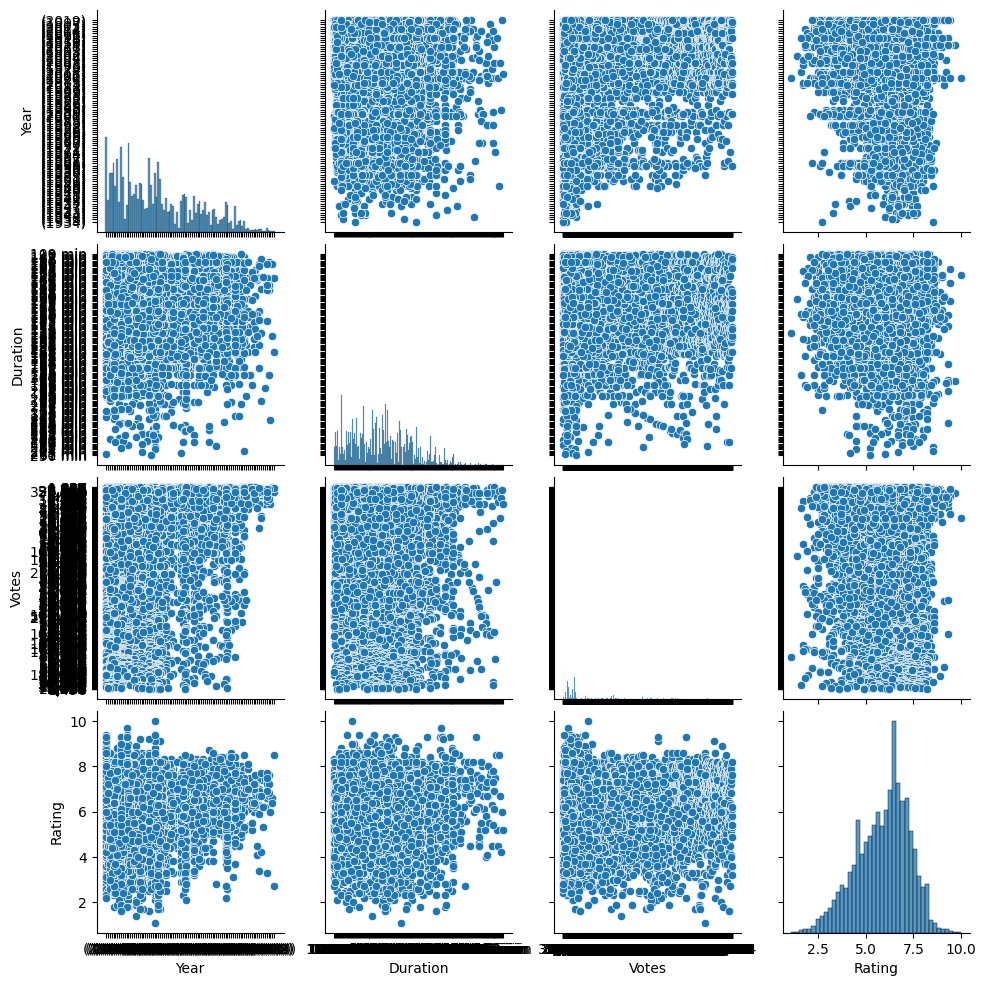

In [ ]:
sns.pairplot(data=df, vars=['Year', 'Duration', 'Votes', 'Rating'])
plt.show()


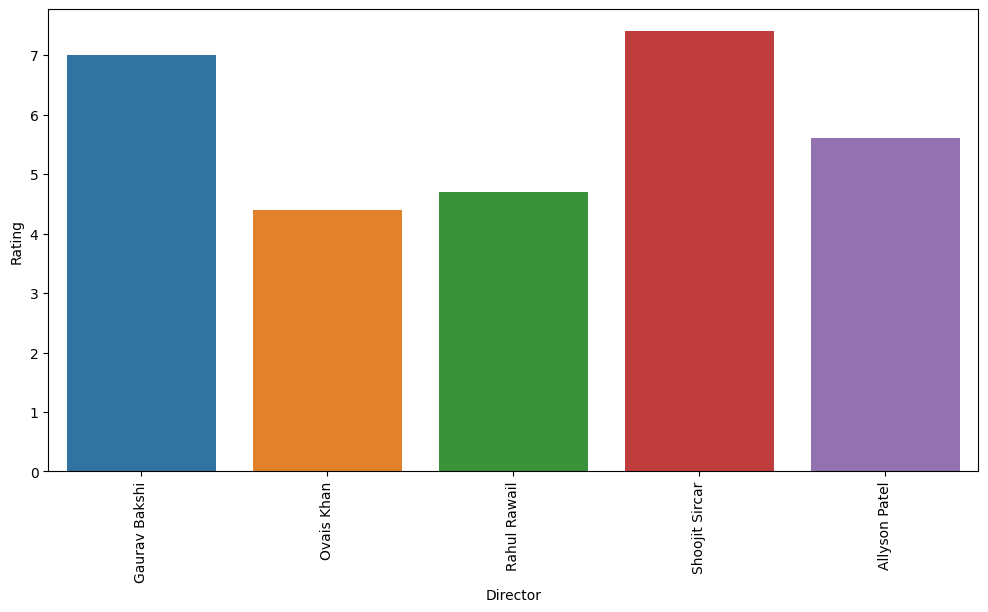

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Director', y='Rating', data=df.head())
plt.xticks(rotation=90)
plt.show()


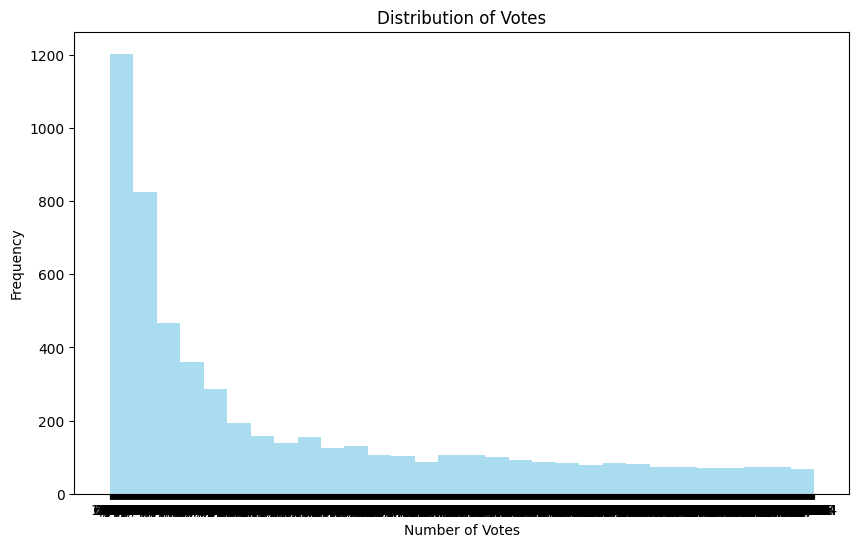

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Votes'], bins=30, color='skyblue', alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes')
plt.show()


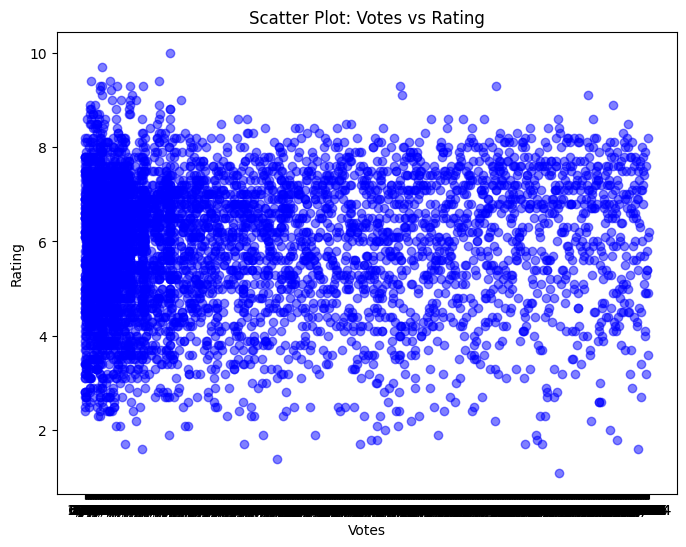

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Votes'], df['Rating'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
features = ['Year', 'Duration', 'Votes']
X = df[features]
y = df['Rating']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1.7073310281488039
R-squared: 0.07798737059748773


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1.4935517364958772
R-squared: 0.19343493381692822
